In [1]:
import wkbl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import nbody_essentials as nbe
from matplotlib.patches import Circle

In [2]:
# path to RAMSES snapshot
path = "/data/OWN/Adicora/output_00041"
# load simulation
myhalo = wkbl.Galaxy_Hound(path)
# calculate center with stars
center = nbe.real_center(myhalo.st.pos3d, myhalo.st.mass)
print("center--> [x y z] =",center," [kpc]")
# recenter the whole thing
myhalo.center_shift(center)
# computes virial radii and cuts data with r>n*rvir
myhalo.r_virial(r_max=400,n=2.5)
print("r200 = {0:.2f} kpc".format(myhalo.r200))

loading Dark matter..
loading Stars..
loading Gas..
center--> [x y z] = [14314.92184042 15227.63864653 15696.15744377]  [kpc]
| Diagonal matrix computed 
|    | 19, 0, 0|
| D =| 0, 15, 0|
|    | 0,  0, 4|
r200 = 210.68 kpc


to calculate the density at the position o each particle it is necesary to load the cfalcon module of unsiotools

In [3]:
import unsiotools.simulations.cfalcon as falcon
cf=falcon.CFalcon()

then the dark matter density can be computed as

In [4]:
pos = np.array(myhalo.dm.pos3d.reshape(len(myhalo.dm.pos3d)*3),dtype=np.float32)
mass = np.array(myhalo.dm.mass,dtype=np.float32)
ok,myhalo.dm.rho,_=cf.getDensity(pos,mass)


And finally by using the Profile class in `nbe`

In [5]:
myhalo.profile = nbe.Profile(myhalo,myhalo.p.reslim)

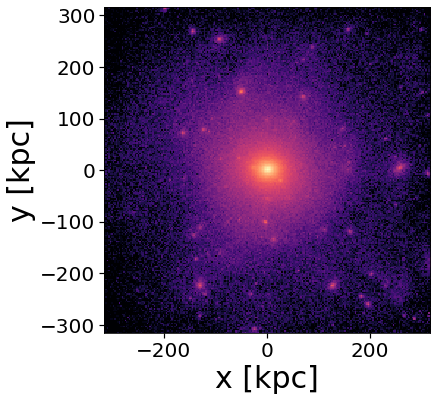

In [6]:

pixels = int(3*myhalo.r200/myhalo.p.reslim/10)
edges = np.linspace(-1.5*myhalo.r200,1.5*myhalo.r200,pixels)
x,y=1,2
H, xedges, yedges = np.histogram2d(myhalo.dm.pos3d[:,x], 
                                   myhalo.dm.pos3d[:,y],
                                   bins=(edges, edges),
                                   weights=myhalo.dm.mass)
fullbox = H.T
a,b = np.mean(fullbox)*0.1, np.max(fullbox)

fig, ax =plt.subplots(figsize=[6,6])
mass_2 = ax.imshow(fullbox+0.1,interpolation='nearest', origin='low',cmap="magma",
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                       norm=LogNorm(vmin=a,vmax=b)
                  )
ax.set_xlabel("x [kpc]",fontsize=30)
ax.set_ylabel("y [kpc]",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20, size=5,width=1.2)

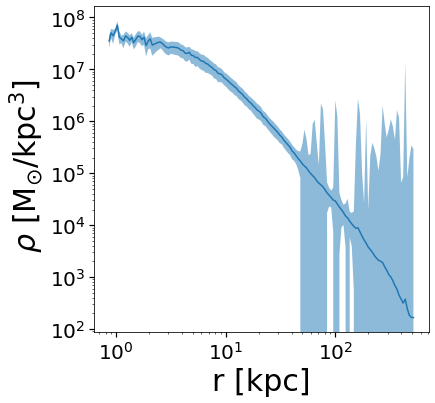

In [7]:
fig, ax =plt.subplots(figsize=[6,6])
ax.loglog()
ax.fill_between(myhalo.profile.r,myhalo.profile.profile+myhalo.profile.std,
                myhalo.profile.profile-myhalo.profile.std,alpha=0.5
               )

ax.plot(myhalo.profile.r,myhalo.profile.profile,)


ax.set_xlabel("r [kpc]",fontsize=30)
ax.set_ylabel(r" $\rho$ [M$_{\odot}$/kpc$^3$]",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20, size=5,width=1.2)